In [1]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pylab as plt
import numpy as np
import mglearn

In [2]:
iris=load_iris()

In [4]:
iris.keys(),iris['target_names'],iris['feature_names']

(dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [5]:
iris['data'].shape

(150, 4)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
random_state=0)

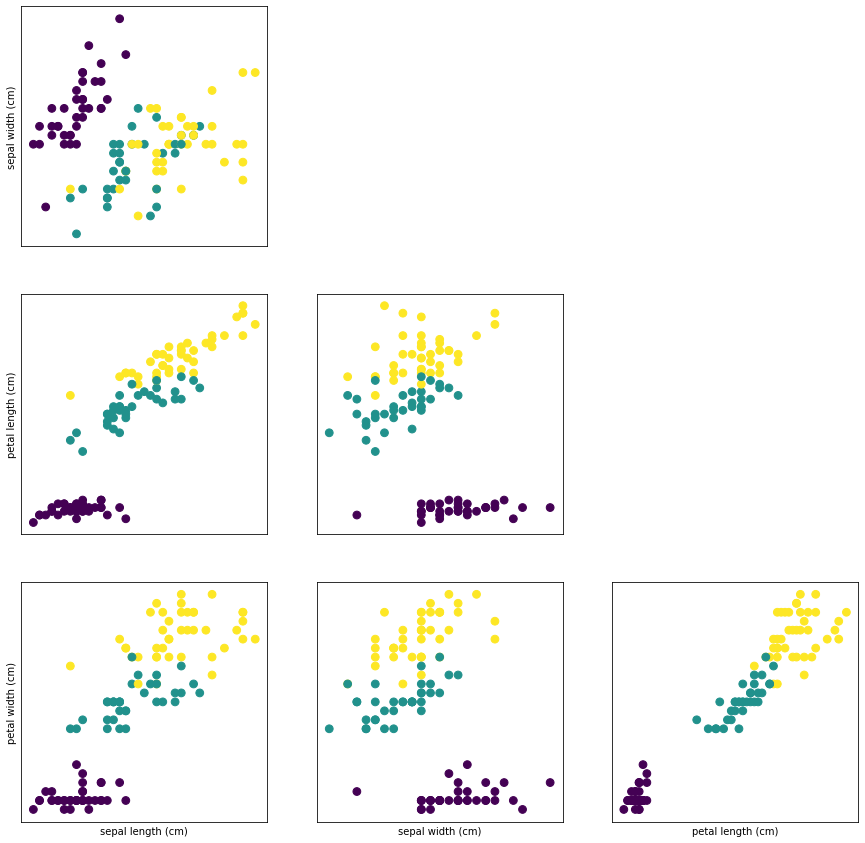

In [9]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j],X_train[:,i+1],c=y_train,s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

# A) Supervised

## KNeighbors

In [4]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train,y_train)
print('train accuracy:',kn.score(X_train,y_train))
print('test accuracy:',kn.score(X_test,y_test))

train accuracy: 0.9732142857142857
test accuracy: 0.9736842105263158


In [5]:
X_new = np.array([[10, 5, 2, 0.5]])
pred = kn.predict(X_new)

In [6]:
iris['target_names'][pred]

array(['versicolor'], dtype='<U10')

In [44]:
pred

array([0])

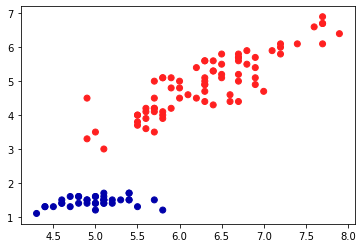

In [29]:
#mglearn.plots.plot_2d_separator(kn, X_train, fill=True)
plt.scatter(X_train[:,0],X_train[:,2],c=y_train,cmap=mglearn.cm2)

## Linear model

In [21]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
print('intercept:',lr.intercept_)
print('coeficent:',lr.coef_)
print('train accuracy:',lr.score(X_train,y_train))
print('test accuracy:',lr.score(X_test,y_test))

intercept: 0.3001513006980048
coeficent: [-0.15330146 -0.02540761  0.26698013  0.57386186]
train accuracy: 0.9402871685925521
test accuracy: 0.8886123598795969


In [25]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.01)
la.fit(X_train,y_train)
print('intercept:',la.intercept_)
print('coeficent:',la.coef_)
print('train accuracy:',la.score(X_train,y_train))
print('test accuracy:',la.score(X_test,y_test))

intercept: -0.08946529538743353
coeficent: [-0.09132659 -0.          0.29798152  0.43452546]
train accuracy: 0.9375046008310588
test accuracy: 0.8893290837760506


In [33]:
from sklearn.linear_model import Ridge
ri = Ridge(alpha=0.0001)
ri.fit(X_train,y_train)
print('intercept:',ri.intercept_)
print('coeficent:',ri.coef_)
print('train accuracy:',ri.score(X_train,y_train))
print('test accuracy:',ri.score(X_test,y_test))

intercept: 0.3001441293312319
coeficent: [-0.15330148 -0.02540658  0.26698479  0.57385083]
train accuracy: 0.9402871685859905
test accuracy: 0.8886122669026764


## Descision Tree (ensemble)

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5,random_state=0)
forest.fit(X_train,y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
max_depth=None, max_features='auto', max_leaf_nodes=None,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
oob_score=False, random_state=2, verbose=0, warm_start=False)
print('train accuracy:',forest.score(X_train,y_train))
print('test accuracy:',forest.score(X_test,y_test))

train accuracy: 0.9910714285714286
test accuracy: 0.9736842105263158


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(random_state=0,learning_rate=0.001)
gbr.fit(X_train,y_train)
print('training score:',gbr.score(X_train,y_train))
print('testing score:',gbr.score(X_test,y_test))

training score: 0.9821428571428571
testing score: 0.9736842105263158


## Support Vector Machines

In [40]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10, gamma=0.1)
svc.fit(X_train,y_train)
print('training score:',svc.score(X_train,y_train))
print('testing score:',svc.score(X_test,y_test))

training score: 0.9910714285714286
testing score: 0.9736842105263158


## Neural network 

In [6]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10,10],alpha=10)
mlp.fit(X_train,y_train)
print('training score:',mlp.score(X_train,y_train))
print('testing score:',mlp.score(X_test,y_test))

training score: 0.9732142857142857
testing score: 0.9736842105263158


In [9]:
print(mlp.classes_)

[0 1 2]


# B) Unsupervised

### Decomposition

 Principal Component Analysis (PCA)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(iris.data)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xp=pca.fit_transform(X)

In [14]:
X.shape,Xp.shape

((150, 4), (150, 2))

In [16]:
pca.components_.shape

(2, 4)

### Clustering

1) KMeans

In [4]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(X_train)
#km.predict()
print('labels:',km.labels_)
print('distace feature:',km.transform(X_train))

labels: [2 2 0 1 0 1 1 2 0 0 2 0 2 0 2 2 2 2 2 2 0 0 2 1 2 2 2 2 2 0 1 1 0 2 1 1 0
 1 2 2 1 2 0 2 1 0 0 0 0 1 1 0 0 1 0 1 2 0 1 1 0 1 1 1 2 0 0 1 1 1 2 2 1 1
 2 1 0 2 0 2 1 2 1 0 1 1 0 1 0 2 2 2 0 0 2 0 1 2 0 2 1 2 2 2 2 1 1 1 0 2 0
 1]
distace feature: [[1.89884777 3.17691638 0.33569164]
 [2.26450343 2.94441071 0.40665932]
 [0.25036306 4.81959265 1.68783484]
 [5.26891879 0.38672266 3.49040582]
 [0.64514423 4.60849249 1.63050377]
 [4.77404495 0.40348192 3.07202263]
 [4.87801544 0.51237427 3.2619022 ]
 [3.29166137 2.58699196 1.43858199]
 [0.53718155 4.60555925 1.42811699]
 [0.51766377 5.10297611 2.03817376]
 [1.56366064 4.0717999  0.86179399]
 [0.69390575 5.00090131 1.75902026]
 [2.50088912 2.80628404 0.61822413]
 [0.9221327  5.76907767 2.73161367]
 [1.27891471 3.75356952 0.8549746 ]
 [2.65058915 2.7337407  0.76732421]
 [1.11475632 4.05936859 0.82949064]
 [1.069788   4.11379851 0.90486819]
 [2.4422216  3.49398523 1.02457896]
 [1.11660168 4.22080918 0.97192597]
 [1.21451003 3.99087985 1.

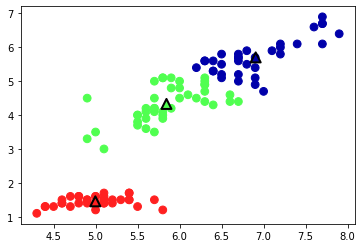

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 2], c=km.labels_, cmap=mglearn.cm3, s=60)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 2],
marker='^', s=100, linewidth=2,edgecolors='k', c=[0, 1,2], cmap=mglearn.cm3)

2) MeanShift

In [13]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(X_train)
#km.predict()
#print('labels:',km.labels_)
#print('distace feature:',km.transform(X_train))

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

Text(0.5, 1.0, 'KMean')

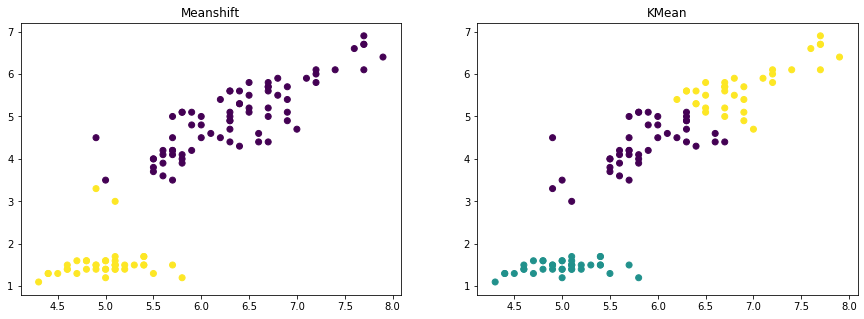

In [29]:
fig, ax= plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(X_train[:, 0], X_train[:, 2], c=ms.predict(X_train))
ax[1].scatter(X_train[:, 0], X_train[:, 2], c=km.predict(X_train))
ax[0].set_title('Meanshift')
ax[1].set_title('KMean')

3) Hierarchial

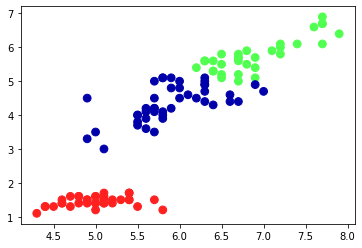

In [4]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=3)
fittransform = agc.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 2], c=fittransform , cmap=mglearn.cm3, s=60)

In [5]:
print('labels:',agc.labels_)

labels: [0 0 2 1 2 1 1 0 2 2 0 2 0 2 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 1 1 2 0 1 1 0
 1 0 0 1 0 2 0 1 2 2 2 2 1 1 2 2 1 2 1 0 2 1 1 2 1 1 1 0 2 2 1 1 1 0 0 1 1
 0 1 2 0 2 0 1 0 1 2 1 1 2 1 2 0 0 0 2 2 0 2 1 0 2 0 1 0 0 0 0 1 1 1 2 0 2
 1]


4) DBSCAN

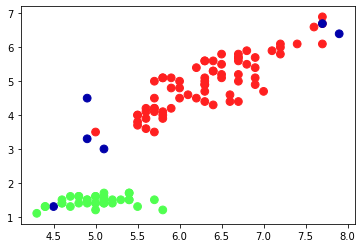

In [17]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.7,min_samples=4)
dbf=db.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 2], c=dbf , cmap=mglearn.cm3, s=60)

In [19]:
print(dbf)

[ 0  0  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1
  0  0  0  0  0  0  1  1  0  0  1  1  0  1  0 -1  1  0  0  0  1  0  0  0
  0  1  1  0  0 -1  0  1  0  0  1  1  0  1  1  1  0  0  0  1  1  1  0  0
  1  1  0  1  0 -1 -1  0  1  0  1  0  1  1  0  1  0  0  0  0  0  0  0  0
  1  0  0  0  1  0  0  0  0  1  1  1  0  0 -1  1]


## Uncertainty

In [27]:
model.score(X_test, y_test)

0.9736842105263158

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
random_state=0)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbr.fit(X_train,y_train)
print('decision function:','\n',gbr.decision_function(X_test[:6]))
print('predict_proba:','\n',gbr.predict_proba(X_test)[:6])
print('training score:','\n',gbr.score(X_train,y_train))
print('testing score:','\n',gbr.score(X_test,y_test))

decision function: 
 [[-1.94506358 -2.01517314  0.12763239]
 [-1.94762574  0.0495959  -1.86974405]
 [ 0.08367196 -2.01610636 -1.86746092]
 [-1.94509191 -2.01517314  0.12763239]
 [ 0.08367196 -2.01610636 -1.86746092]
 [-1.94506358 -2.01517314  0.12763239]]
predict_proba: 
 [[0.10122985 0.09437575 0.8043944 ]
 [0.10582515 0.77977843 0.11439643]
 [0.79076603 0.09685585 0.11237812]
 [0.10122728 0.09437602 0.8043967 ]
 [0.79076603 0.09685585 0.11237812]
 [0.10122985 0.09437575 0.8043944 ]]
training score: 
 1.0
testing score: 
 0.9736842105263158
